In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
pwd()

'C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\ROoptjulia\\post analysis'

In [3]:
I = 10
k_list = [5,10,15,20,25,30]

### for publication

k_list = [5,15,25]

In [4]:
parent_dir = 'C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\ROoptjulia\\'
working_folder = 'Three Stage RO'

results_decomposition_k_dict = dict()
results_exact_k_dict = dict()
results_NN_k_dict = dict()
results_decomposition_l2exact_k_dict = dict()
results_decomposition_improved_k_dict = dict()

time_decomposition_k_dict = dict()
time_exact_k_dict = dict()
time_NN_k_dict = dict()
time_decomposition_l2exact_k_dict = dict()
time_decomposition_improved_k_dict = dict()

for k in k_list:
    
    ### Restricted NN layer
    results_folder = 'results'
    
    file_name = "results_decomposition_"+str(I)+"_"+str(k)+".json"
    file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
    with open(file_path, 'r') as file:
        result_decomposition = json.load(file)
    results_decomposition_k_dict[k] = result_decomposition
    
    file_name = "times_decomposition_"+str(I)+"_"+str(k)+".json"
    file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
    with open(file_path, 'r') as file:
        time_decomposition = json.load(file)
    time_decomposition_k_dict[k] = time_decomposition
    
    file_name = "results_exact_"+str(I)+"_"+str(k)+".json"
    file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
    with open(file_path, 'r') as file:
        result_exact= json.load(file)
    results_exact_k_dict[k] = result_exact
    
    file_name = "times_exact_"+str(I)+"_"+str(k)+".json"
    file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
    with open(file_path, 'r') as file:
        time_exact = json.load(file)
    time_exact_k_dict[k] = time_exact
    
    file_name = "results_decomposition_2level_exact_"+str(I)+"_"+str(k)+".json"
    file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
    with open(file_path, 'r') as file:
        result_decomposition_l2exact = json.load(file)
    results_decomposition_l2exact_k_dict[k] = result_decomposition_l2exact 
    
    file_name = "times_decomposition_2level_exact_"+str(I)+"_"+str(k)+".json"
    file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
    with open(file_path, 'r') as file:
        time_decomposition_l2exact = json.load(file)
    time_decomposition_l2exact_k_dict[k] = time_decomposition_l2exact 
    
    
    # file_name = "results_embed_NN_"+str(I)+"_"+str(k)+".json"
    # file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
    # with open(file_path, 'r') as file:
    #     result_embed_NN = json.load(file)
    # results_NN_k_dict[k] = result_embed_NN
    # file_name = "times_embed_NN_"+str(I)+"_"+str(k)+".json"
    # file_path = os.path.join(parent_dir, working_folder, results_folder,file_name)
    # with open(file_path, 'r') as file:
    #     time_embed_NN = json.load(file)
    # time_NN_k_dict[k] = time_embed_NN
    
    ##### change results folder for improved NN results #######
    results_folder = 'results improved NN'
    
    file_name = "results_decomposition_"+str(I)+"_"+str(k)+".json"
    file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
    with open(file_path, 'r') as file:
        result_decomposition_improved = json.load(file)
    results_decomposition_improved_k_dict[k] = result_decomposition_improved
    
    file_name = "times_decomposition_"+str(I)+"_"+str(k)+".json"
    file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
    with open(file_path, 'r') as file:
        time_decomposition_improved = json.load(file)
    time_decomposition_improved_k_dict[k] = time_decomposition_improved

In [5]:
# nn_list = [5,10,15,20,25,30]
nn_list = [5,15,25]
for k in nn_list:
    results_folder = 'results'
    file_name = "results_embed_NN_"+str(I)+"_"+str(k)+".json"
    file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
    with open(file_path, 'r') as file:
        result_embed_NN = json.load(file)
    results_NN_k_dict[k] = result_embed_NN
    file_name = "times_embed_NN_"+str(I)+"_"+str(k)+".json"
    file_path = os.path.join(parent_dir, working_folder, results_folder,file_name)
    with open(file_path, 'r') as file:
        time_embed_NN = json.load(file)
    time_NN_k_dict[k] = time_embed_NN
    
obj_NN_k_dict = dict()
obj_exact_random_k_dict = dict()
for k in nn_list:
    obj_value_NN = np.array([results_NN_k_dict[k][str(i)]['objective_value'] for i in results_NN_k_dict[k].keys()])
    obj_value_exact_random = np.array([results_exact_k_dict[k][str(i)]['objective_value'] for i in results_NN_k_dict[k].keys()])
    obj_NN_k_dict[k] = obj_value_NN
    obj_exact_random_k_dict[k] = obj_value_exact_random
    
relative_difference_NN_exact = dict()

for k in nn_list:
    relative_difference_NN_exact[k] = (obj_exact_random_k_dict[k]- obj_NN_k_dict[k]) * 100 /obj_exact_random_k_dict[k]

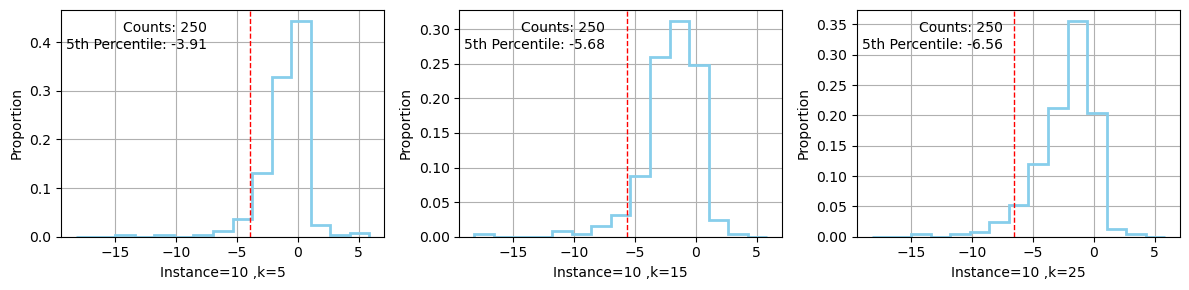

In [45]:
# Determine the number of subplots needed
num_plots = len(relative_difference_NN_exact)
num_cols = 3  # Adjust the number of columns 
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3))

# Flatten axs for easy iteration if there are multiple rows and columns
if num_rows > 1:
    axs = axs.flatten()

# Combine all datasets to determine common bin edges
combined_data = np.concatenate([v for v in relative_difference_NN_exact.values()])
bin_edges = np.histogram_bin_edges(combined_data, bins=15)

# Loop over each key in the relative_difference dictionary
for idx, (k, rel_diff) in enumerate(relative_difference_NN_exact.items()):
    ax = axs[idx]
    
    # Plot the histogram with proportions normalization and common bin edges
    ax.hist(rel_diff, bins=bin_edges, alpha=1, color='skyblue', weights=np.ones_like(rel_diff) / 250, histtype='step', linewidth=2)
    
    # Add 5th percentile line
    p5 = np.percentile(rel_diff, 5)
    ax.axvline(p5, color='red', linestyle='dashed', linewidth=1)
    
    # Add grid, labels, and title
    ax.grid(True)
    #ax.set_xlabel(f"Relative Objective Difference % for Instance={I} ,k={k}")
    ax.set_xlabel(f"Instance={I} ,k={k}")
    ax.set_ylabel("Proportion")
    #ax.text(0.05, 0.95, r"$\sum_{i=1}^{250}\frac{O_{exact}-O_{NN}}{O_{exact}}$", transform=ax.transAxes,
            #fontsize=10, verticalalignment='top')
    
    # Add the total number of counts and 5th percentile value
    total_counts = len(rel_diff)
    ax.text(0.45, 0.95, f'Counts: {total_counts}\n5th Percentile: {p5:.2f}', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')

#fig.suptitle("Objective value comparison: Exact vs NN")

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined plot
plt.savefig(f".\\objective value plots\\Obj_exact_vs_NN_combined_I={I}.png")

# Show the plot
plt.show()

In [6]:
#### Get objective value for k=5,10,15,20 in 5 different arrays of size 250, store in a dict

# Initialize the dictionaries to store the results
obj_exact_k_dict = dict()
obj_decomp_k_dict = dict()
obj_NN_k_dict = dict()
obj_decomp_l2exact_k_dict = dict()
obj_decomp_improved_k_dict = dict()
## iteration number during convergces for each k and seed
iter_at_converge_decomp_k_dict =dict()

for k in k_list:
    # Use list comprehensions to extract objective values and convert to numpy arrays
    obj_value_exact = np.array([results_exact_k_dict[k][str(i)]['objective_value'] for i in range(1, 251)])
    obj_value_decomp = np.array([results_decomposition_k_dict[k][str(i)][-1]["objective_value"] for i in range(1, 251)])
    obj_value_decomp_improved = np.array([results_decomposition_improved_k_dict[k][str(i)][-1]["objective_value"] for i in range(1, 251)])
    #obj_value_NN = np.array([results_NN_k_dict[k][str(i)]['objective_value'] for i in results_NN_k_dict[k].keys()])
    obj_value_decomp_l2exact = np.array([results_decomposition_l2exact_k_dict[k][str(i)][-1]["objective_value"] for i in range(1, 251)])
    iter_at_converge = np.array([results_decomposition_k_dict[k][str(i)][-1]["iteration"] for i in range(1, 251)])
    
    # Store the arrays in the dictionaries
    obj_exact_k_dict[k] = obj_value_exact
    obj_decomp_k_dict[k] = obj_value_decomp
    obj_decomp_improved_k_dict[k] = obj_value_decomp_improved
    #obj_NN_k_dict[k] = obj_value_NN
    obj_decomp_l2exact_k_dict[k] = obj_value_decomp_l2exact
    iter_at_converge_decomp_k_dict[k] = iter_at_converge
    
relative_difference_decom_exact = dict()
relative_difference_decom_improved_exact = dict()
#relative_difference_NN_exact = dict()
relative_difference_decom_decom_l2exact = dict()
relative_difference_decom_l2exact_exact = dict()

for k in k_list:
    relative_difference_decom_exact[k] = (obj_exact_k_dict[k]- obj_decomp_k_dict[k]) * 100 /obj_exact_k_dict[k]
    relative_difference_decom_improved_exact[k] = (obj_exact_k_dict[k]- obj_decomp_improved_k_dict[k]) * 100 /obj_exact_k_dict[k]
    #relative_difference_NN_exact[k] = (obj_exact_k_dict[k]- obj_NN_k_dict[k]) * 100 /obj_exact_k_dict[k]
    relative_difference_decom_decom_l2exact[k] = (obj_decomp_l2exact_k_dict[k] - obj_decomp_k_dict[k]) * 100 /obj_decomp_l2exact_k_dict[k][k]
    relative_difference_decom_l2exact_exact[k] = (obj_exact_k_dict[k] - obj_decomp_l2exact_k_dict[k]) * 100 /obj_exact_k_dict[k][k]

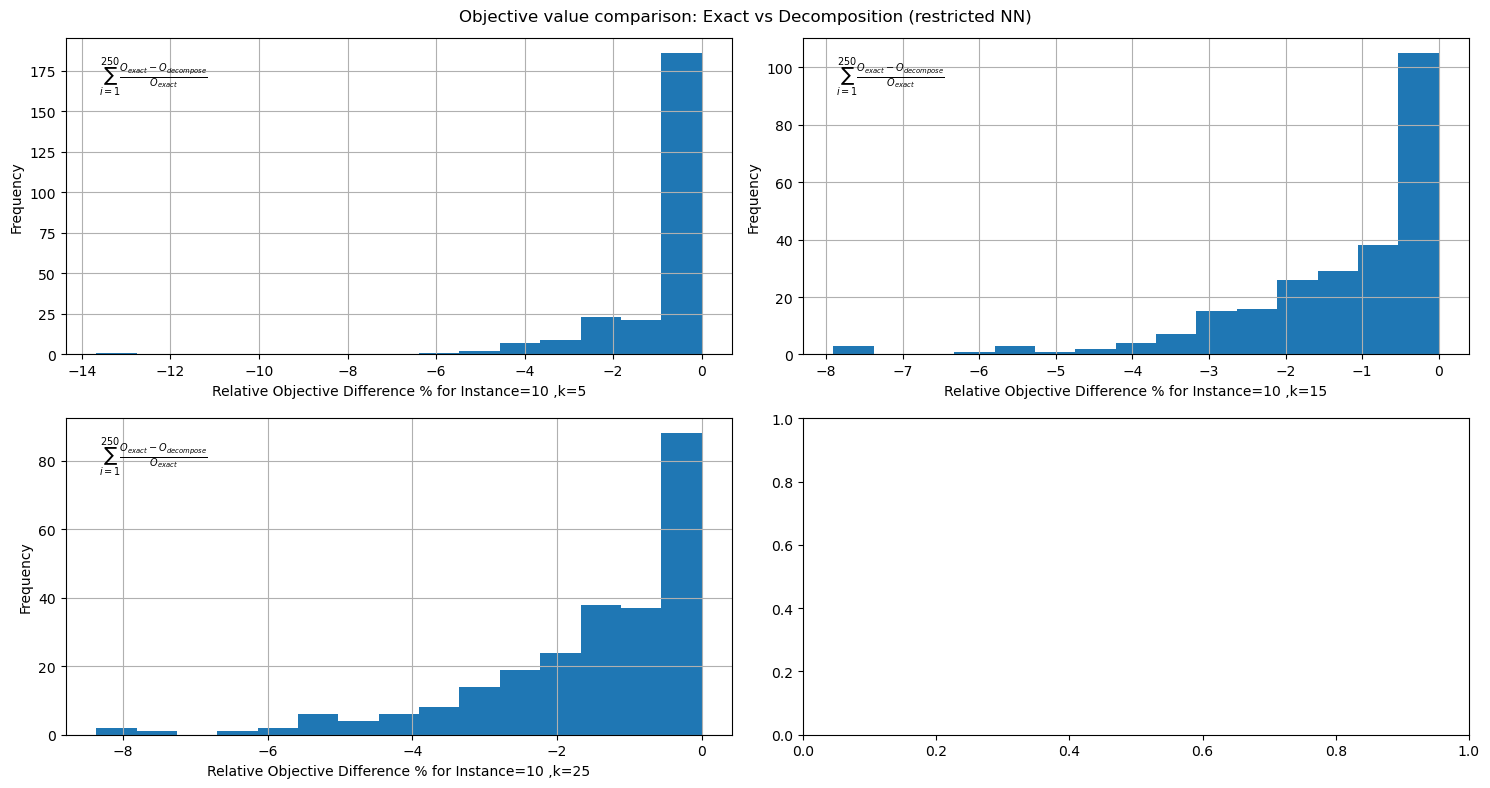

In [47]:
# # Determine the number of subplots needed
# num_plots = len(relative_difference_decom_exact)
# num_cols = 2  # Adjust the number of columns 
# num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# # Flatten axs for easy iteration if there are multiple rows and columns
# if num_rows > 1:
#     axs = axs.flatten()

# # Loop over each key in the relative_difference dictionary
# for idx, (k, rel_diff) in enumerate(relative_difference_decom_exact.items()):
#     ax = axs[idx]
    
#     # Plot the histogram
#     ax.hist(rel_diff, bins=15)
    
#     # Add grid, labels, and title
#     ax.grid(True)
#     ax.set_xlabel("Relative Objective Difference % for Instance=" + str(I) +" ,k=" + str(k))
#     ax.set_ylabel("Frequency")
#     #ax.set_title("Objective value comparison: Exact vs Decomposition")
#     ax.text(0.05, 0.95, r"$\sum_{i=1}^{250}\frac{O_{exact}-O_{decompose}}{O_{exact}}$", transform=ax.transAxes,
#             fontsize=10, verticalalignment='top')
# #fig.suptitle("Objective value comparison: Exact vs Decomposition (Improved MSE)")
# fig.suptitle("Objective value comparison: Exact vs Decomposition (restricted NN)")
# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Save the combined plot
# #plt.savefig(".\\objective value plots\\(Improved MSE)_Obj_exact_vs_decompose_combined_I="+str(I)+".png")
# plt.savefig(".\\objective value plots\\Obj_exact_vs_decompose_combined_I="+str(I)+".png")

# # Show the plot
# plt.show()

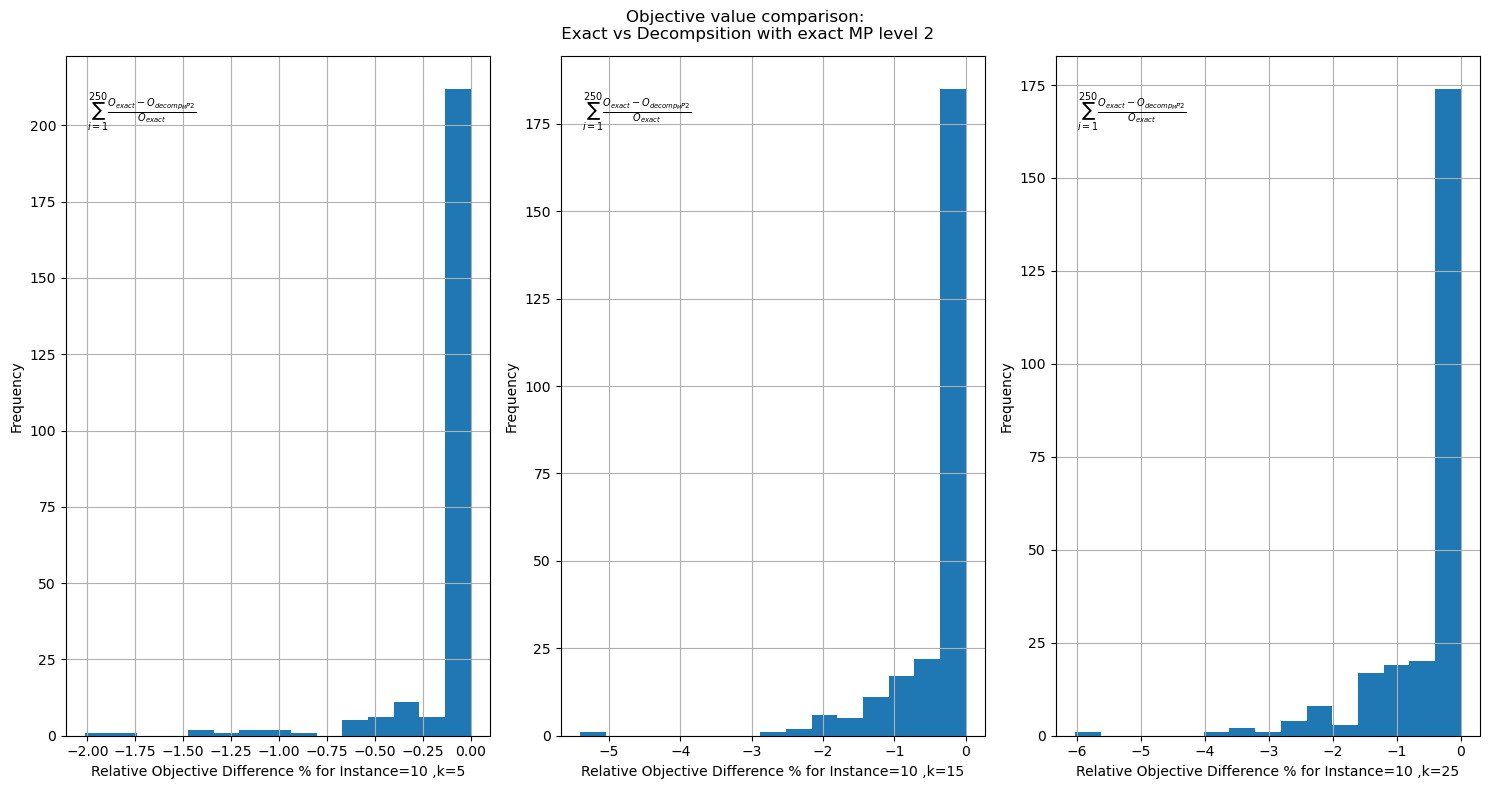

In [48]:
# # Determine the number of subplots needed
# num_plots = len(relative_difference_decom_l2exact_exact)
# num_cols = 3  # Adjust the number of columns 
# num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# # Flatten axs for easy iteration if there are multiple rows and columns
# if num_rows > 1:
#     axs = axs.flatten()

# # Loop over each key in the relative_difference dictionary
# for idx, (k, rel_diff) in enumerate(relative_difference_decom_l2exact_exact.items()):
#     ax = axs[idx]
    
#     # Plot the histogram
#     ax.hist(rel_diff, bins=15)
    
#     # Add grid, labels, and title
#     ax.grid(True)
#     ax.set_xlabel("Relative Objective Difference % for Instance=" + str(I) +" ,k=" + str(k))
#     ax.set_ylabel("Frequency")
#     #ax.set_title()
#     ax.text(0.05, 0.95, r"$\sum_{i=1}^{250}\frac{O_{exact}-O_{decomp_MP2}}{O_{exact}}$", transform=ax.transAxes,
#             fontsize=10, verticalalignment='top')

# fig.suptitle("Objective value comparison:\n Exact vs Decompsition with exact MP level 2")
# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Save the combined plot
# plt.savefig(".\\objective value plots\\Obj_exact_vs_Decomposition_MP level 2_combined_I="+str(I)+".png")

# # Show the plot
# plt.show()

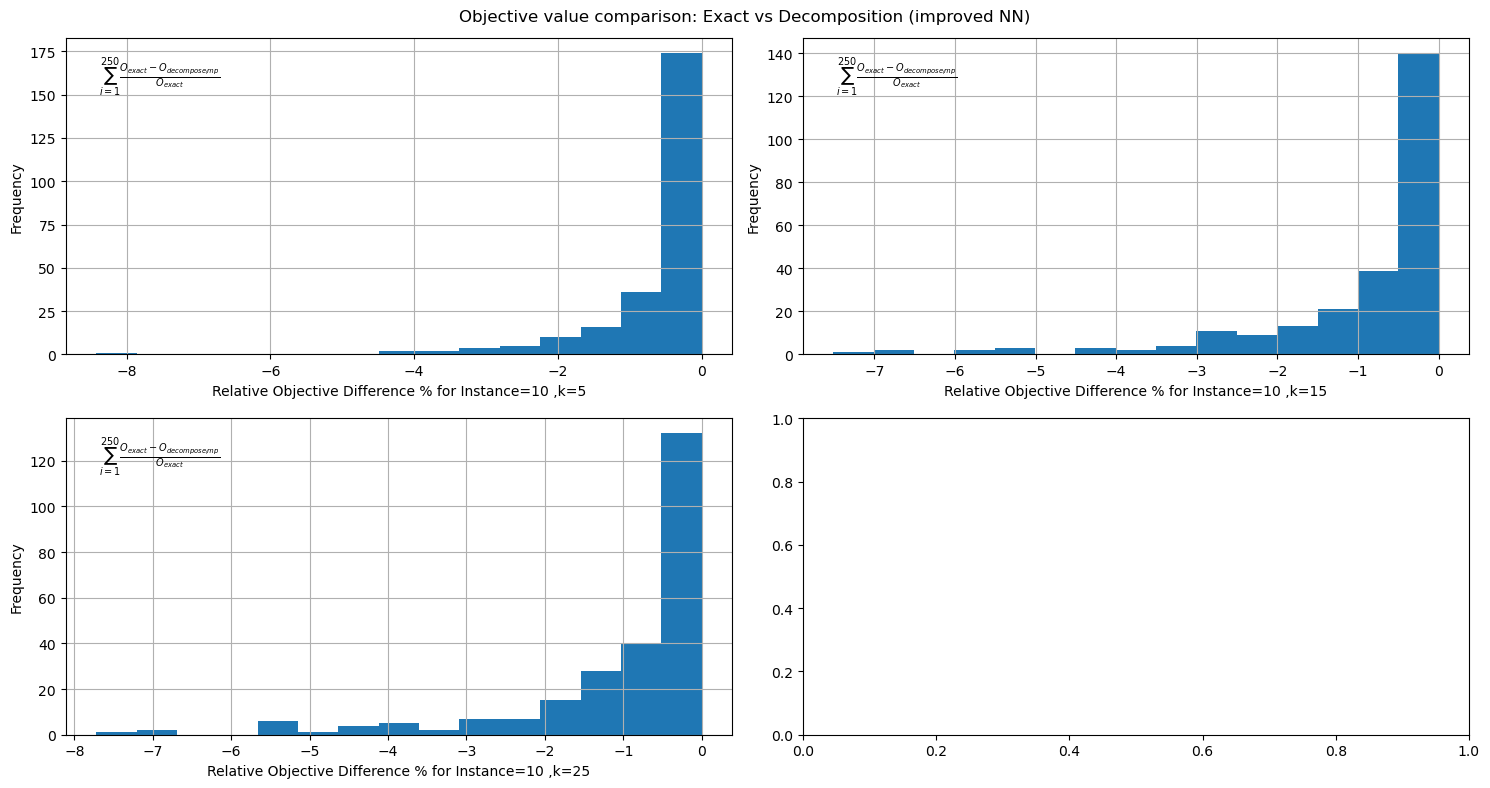

In [49]:
# # Determine the number of subplots needed
# num_plots = len(relative_difference_decom_improved_exact)
# num_cols = 2  # Adjust the number of columns 
# num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# # Flatten axs for easy iteration if there are multiple rows and columns
# if num_rows > 1:
#     axs = axs.flatten()

# # Loop over each key in the relative_difference dictionary
# for idx, (k, rel_diff) in enumerate(relative_difference_decom_improved_exact.items()):
#     ax = axs[idx]
    
#     # Plot the histogram
#     ax.hist(rel_diff, bins=15)
    
#     # Add grid, labels, and title
#     ax.grid(True)
#     ax.set_xlabel("Relative Objective Difference % for Instance=" + str(I) +" ,k=" + str(k))
#     ax.set_ylabel("Frequency")
#     #ax.set_title("Objective value comparison: Exact vs Decomposition")
#     ax.text(0.05, 0.95, r"$\sum_{i=1}^{250}\frac{O_{exact}-O_{decompose_imp}}{O_{exact}}$", transform=ax.transAxes,
#             fontsize=10, verticalalignment='top')
# #fig.suptitle("Objective value comparison: Exact vs Decomposition (Improved MSE)")
# fig.suptitle("Objective value comparison: Exact vs Decomposition (improved NN)")
# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Save the combined plot
# #plt.savefig(".\\objective value plots\\(Improved MSE)_Obj_exact_vs_decompose_combined_I="+str(I)+".png")
# plt.savefig(".\\objective value plots\\Obj_exact_vs_decompose_imp_NN_combined_I="+str(I)+".png")

# # Show the plot
# plt.show()

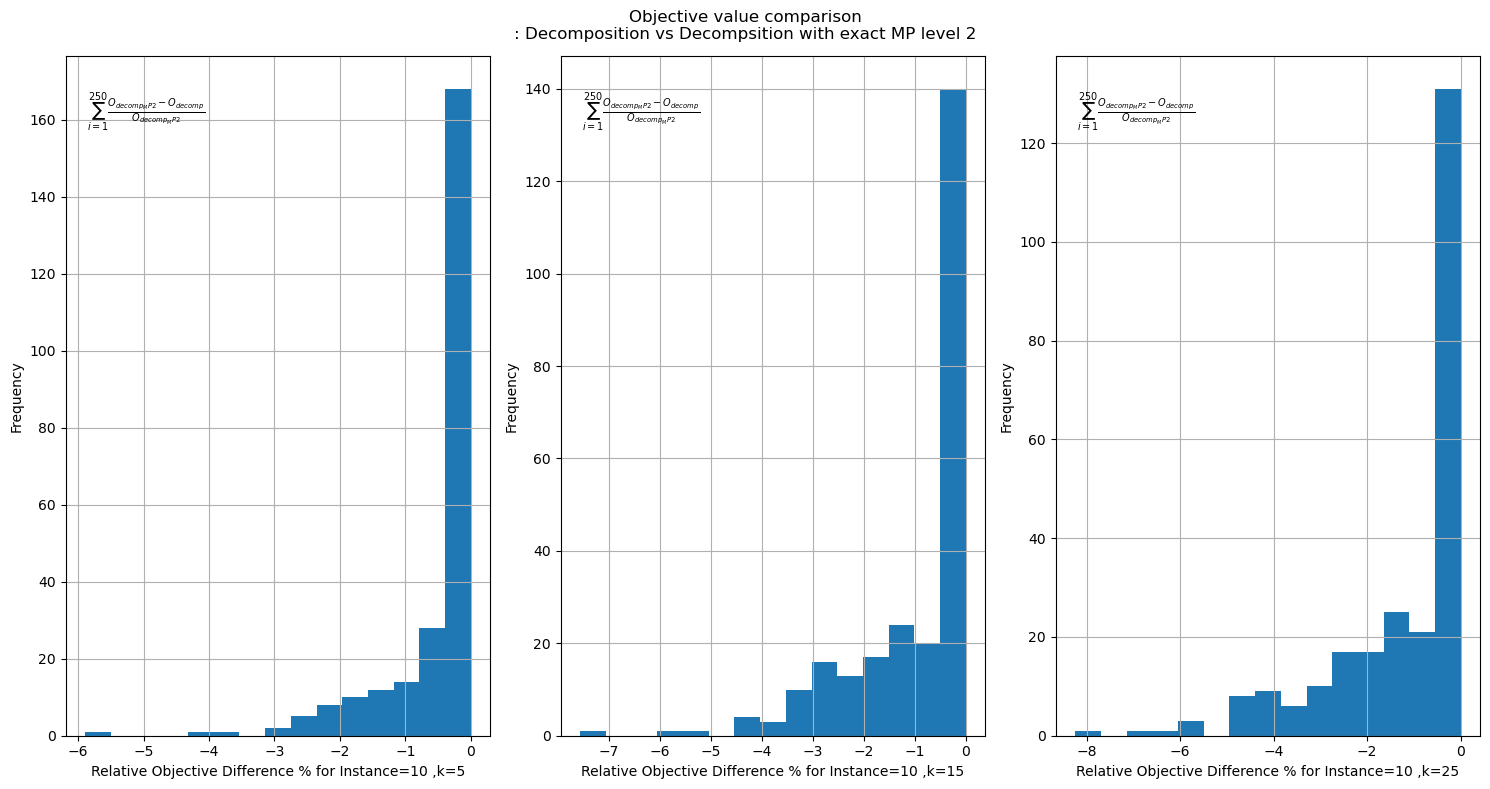

In [50]:
# # Determine the number of subplots needed
# num_plots = len(relative_difference_decom_decom_l2exact)
# num_cols = 3  # Adjust the number of columns 
# num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# # Flatten axs for easy iteration if there are multiple rows and columns
# if num_rows > 1:
#     axs = axs.flatten()

# # Loop over each key in the relative_difference dictionary
# for idx, (k, rel_diff) in enumerate(relative_difference_decom_decom_l2exact.items()):
#     ax = axs[idx]
    
#     # Plot the histogram
#     ax.hist(rel_diff, bins=15)
    
#     # Add grid, labels, and title
#     ax.grid(True)
#     ax.set_xlabel("Relative Objective Difference % for Instance=" + str(I) +" ,k=" + str(k))
#     ax.set_ylabel("Frequency")
#     #ax.set_title("Objective value comparison\n: Decomposition vs Decompsition with exact MP level 2")
#     ax.text(0.05, 0.95, r"$\sum_{i=1}^{250}\frac{O_{decomp_MP2}-O_{decomp}}{O_{decomp_MP2}}$", transform=ax.transAxes,
#             fontsize=10, verticalalignment='top')
# fig.suptitle("Objective value comparison\n: Decomposition vs Decompsition with exact MP level 2")
# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Save the combined plot
# plt.savefig(".\\objective value plots\\Obj_Decomposition_vs_Decomposition_MP level 2_combined_I="+str(I)+".png")

# # Show the plot
# plt.show()

In [9]:
# for k in k_list:
#     print("#################")
#     print("k = "+str(k))
#     print(np.array([time_decomposition_k_dict[k][str(i)]["value"] for i in range(2,251)]).mean())
#     print(np.array([time_decomposition_l2exact_k_dict[k][str(i)]["value"] for i in range(2,251)]).mean())
# print("#################")

In [55]:
plt.hist(-relative_difference_decom_l2exact_exact[30])

KeyError: 30

In [ ]:
plt.hist(relative_difference_decom_improved_exact[30])

### 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
import json

# ========== Configuration ==========
I_list = [10, 20, 30]
k_list = [5, 15, 25]
parent_dir = 'C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\ROoptjulia\\'
working_folder = 'Three Stage RO'
global_min = -0.1  # Positive improvement range
global_max = 10
num_bins = 20

# ========== Data Loading ==========
# Initialize data storage dictionaries
results_decomposition = {}
results_exact = {}
results_decomposition_l2exact = {}
results_decomposition_improved = {}

for I in I_list:
    results_decomposition[I] = {}
    results_exact[I] = {}
    results_decomposition_l2exact[I] = {}
    results_decomposition_improved[I] = {}
    
    for k in k_list:
        # Load decomposition results
        with open(os.path.join(parent_dir, working_folder, 'results', 
                             f'results_decomposition_{I}_{k}.json'), 'r') as f:
            results_decomposition[I][k] = json.load(f)
        
        # Load exact results
        with open(os.path.join(parent_dir, working_folder, 'results',
                             f'results_exact_{I}_{k}.json'), 'r') as f:
            results_exact[I][k] = json.load(f)
        
        # Load l2exact results
        with open(os.path.join(parent_dir, working_folder, 'results',
                             f'results_decomposition_2level_exact_{I}_{k}.json'), 'r') as f:
            results_decomposition_l2exact[I][k] = json.load(f)
        
        # Load improved decomposition results
        with open(os.path.join(parent_dir, working_folder, 'results improved NN',
                             f'results_decomposition_{I}_{k}.json'), 'r') as f:
            results_decomposition_improved[I][k] = json.load(f)

# ========== Data Processing ==========
# Initialize objective value storage
obj_exact = {}
obj_decomp = {}
obj_decomp_improved = {}
obj_decomp_l2exact = {}

for I in I_list:
    obj_exact[I] = {}
    obj_decomp[I] = {}
    obj_decomp_improved[I] = {}
    obj_decomp_l2exact[I] = {}
    
    for k in k_list:
        obj_exact[I][k] = np.array([results_exact[I][k][str(i)]['objective_value'] for i in range(1, 251)])
        obj_decomp[I][k] = np.array([results_decomposition[I][k][str(i)][-1]["objective_value"] for i in range(1, 251)])
        obj_decomp_improved[I][k] = np.array([results_decomposition_improved[I][k][str(i)][-1]["objective_value"] for i in range(1, 251)])
        obj_decomp_l2exact[I][k] = np.array([results_decomposition_l2exact[I][k][str(i)][-1]["objective_value"] for i in range(1, 251)])



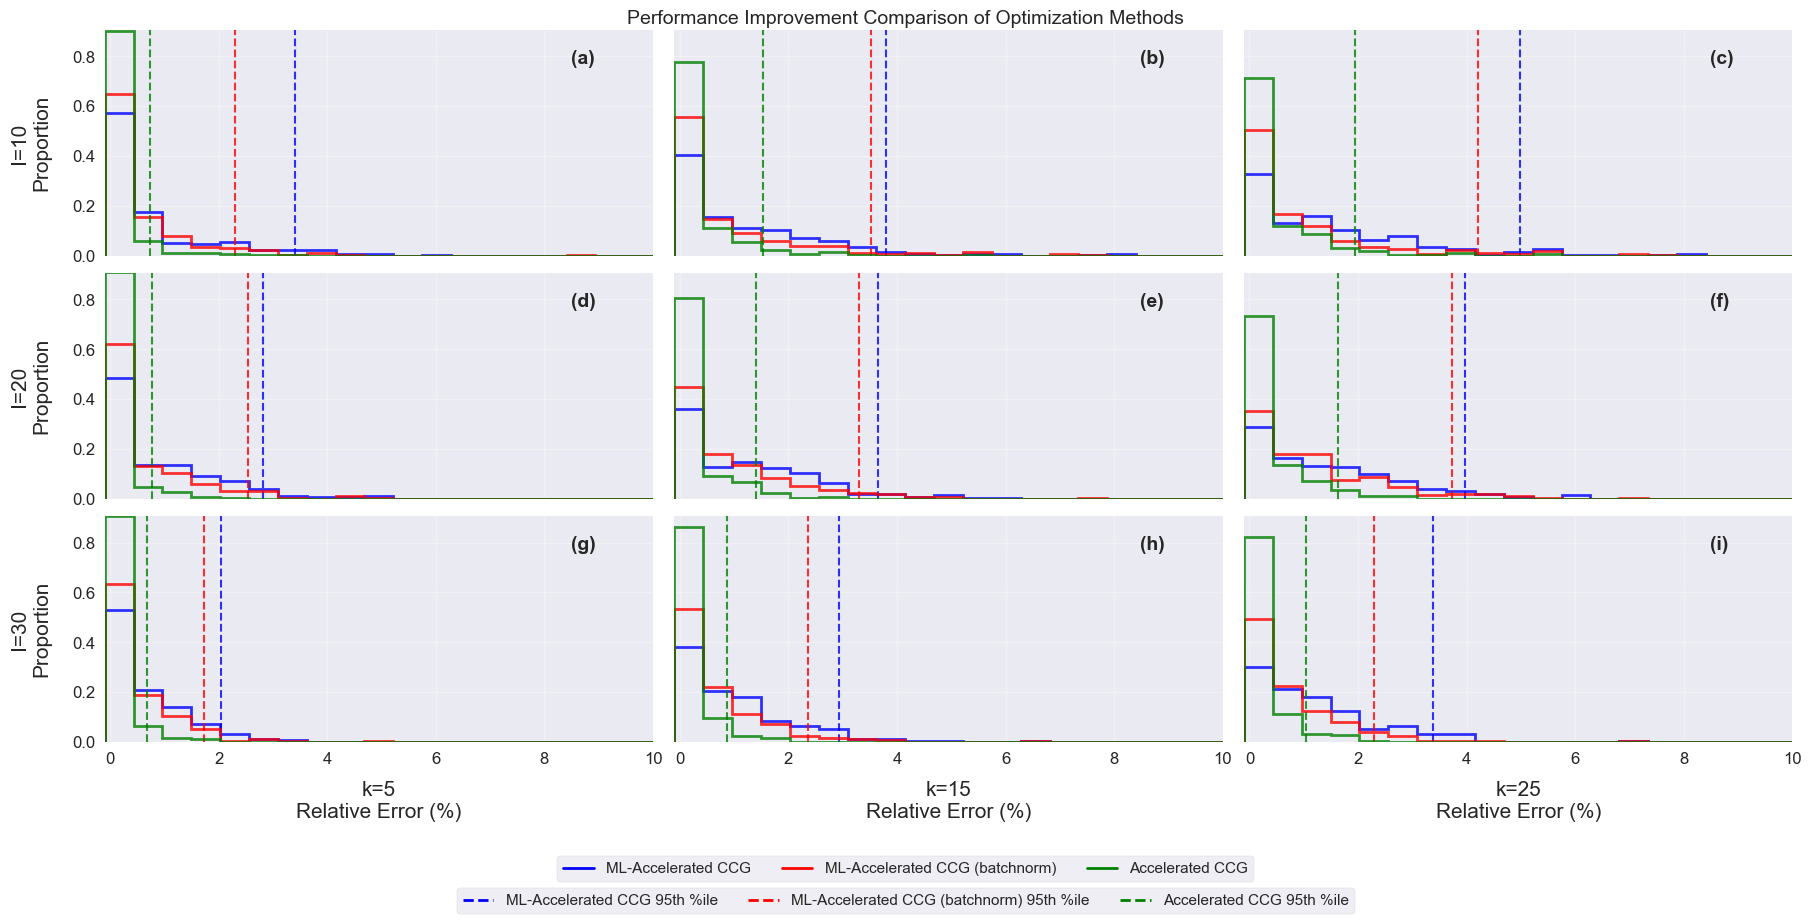

In [17]:
# # ========== Plotting ==========
# # Create figure and axes
# fig, axs = plt.subplots(len(I_list), len(k_list), 
#                        figsize=(12, 5),
#                        #sharex=True, sharey=False,  # Allow independent y-scales
#                        constrained_layout=True)
# plt.rcParams.update({'font.size': 12, 'axes.labelpad': 10})
# Create figure and axes
fig, axs = plt.subplots(len(I_list), len(k_list), 
                       figsize=(18, 8),
                       sharex=True, sharey=True,
                       constrained_layout=True)
plt.rcParams.update({'font.size': 12, 'axes.labelpad': 10})

# Create and sort global bins
global_bins = np.sort(np.linspace(global_min, global_max, num_bins))

# Plot each subfigure
for row_idx, I in enumerate(I_list):
    for col_idx, k in enumerate(k_list):
        ax = axs[row_idx, col_idx]
        max_proportion = 0  # Track maximum proportion for this subplot
        
        # Calculate percentage improvements
        rd_restricted = (obj_decomp[I][k] - obj_exact[I][k]) * 100 / obj_exact[I][k]
        rd_improved = (obj_decomp_improved[I][k] - obj_exact[I][k]) * 100 / obj_exact[I][k]
        rd_mp = (obj_decomp_l2exact[I][k] - obj_exact[I][k]) * 100 / obj_exact[I][k]

        # Plot histograms for each method
        for data, color in zip([rd_restricted, rd_improved, rd_mp],
                             ['blue', 'red', 'green']):
            # Filter data to bin range
            filtered_data = data[(data >= global_min) & (data <= global_max)]
            
            if len(filtered_data) > 0:
                # Calculate proper proportions
                weights = np.ones_like(filtered_data)/len(filtered_data)
                counts, _, _ = ax.hist(filtered_data, bins=global_bins, 
                                     weights=weights,
                                     histtype='step', linewidth=2,
                                     alpha=0.8, color=color)
                
                # Update max proportion with 10% padding
                current_max = np.max(counts) * 1.1
                max_proportion = max(max_proportion, current_max)
                
                # Add 95th percentile line
                p95 = np.percentile(data, 95)
                ax.axvline(p95, color=color, linestyle='--',
                          linewidth=1.5, alpha=0.8)
            else:
                print(f"No data in range for I={I}, k={k}, method={color}")

        # Set axis limits and labels
        ax.set_xlim(global_min, global_max)
        ax.set_ylim(0, min(max_proportion, 1))  # Cap at 1 if needed
        ax.grid(True, alpha=0.3)
        
        # Add labels
        if row_idx == len(I_list)-1:
            ax.set_xlabel(f'k={k}\nRelative Error (%)', labelpad=10)
        if col_idx == 0:
            ax.set_ylabel(f'I={I}\nProportion', labelpad=15)
            
        # Add subplot letter
        ax.text(0.85, 0.85, f'({chr(97 + row_idx*3 + col_idx)})', 
                transform=ax.transAxes, fontsize=14, fontweight='bold')

# ========== Legends ==========
# Create legend elements
method_legend = [
    Line2D([0], [0], color='blue', lw=2, label='ML-Accelerated CCG'),
    Line2D([0], [0], color='red', lw=2, label='ML-Accelerated CCG (batchnorm)'),
    Line2D([0], [0], color='green', lw=2, label='Accelerated CCG')
]

percentile_legend = [
    Line2D([0], [0], color='blue', lw=2, linestyle='--', 
           label='ML-Accelerated CCG 95th %ile'),
    Line2D([0], [0], color='red', lw=2, linestyle='--', 
           label='ML-Accelerated CCG (batchnorm) 95th %ile'),
    Line2D([0], [0], color='green', lw=2, linestyle='--', 
           label='Accelerated CCG 95th %ile')
]

# Add legends with proper spacing
method_legend = fig.legend(
    handles=method_legend,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.08),
    ncol=3,
    #title='Optimization Methods:',
    title_fontsize=12,
    fontsize=11,
    frameon=True
)

percentile_legend = fig.legend(
    handles=percentile_legend,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=3,
    #title='Performance Thresholds:',
    title_fontsize=12,
    fontsize=11,
    frameon=True
)

# ========== Final Adjustments ==========
plt.suptitle("Performance Improvement Comparison of Optimization Methods", y=1.02, fontsize=14)
plt.savefig("final_optimization_comparison.png", 
           dpi=300, bbox_inches='tight')
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
import json

# ========== Configuration ==========
I_list = [10, 20, 30]
k_list = [5, 15, 25]
parent_dir = 'C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\ROoptjulia\\'
working_folder = 'Three Stage RO'
global_min = -0.1  # Positive improvement range
global_max = 14
num_bins = 20

# ========== Data Loading ==========
results_decomposition = {}
results_exact = {}
results_decomposition_l2exact = {}
results_decomposition_improved = {}

for I in I_list:
    results_decomposition[I] = {}
    results_exact[I] = {}
    results_decomposition_l2exact[I] = {}
    results_decomposition_improved[I] = {}
    
    for k in k_list:
        # Load decomposition results
        with open(os.path.join(parent_dir, working_folder, 'results', 
                               f'results_decomposition_{I}_{k}.json'), 'r') as f:
            results_decomposition[I][k] = json.load(f)
        
        # Load exact results
        with open(os.path.join(parent_dir, working_folder, 'results',
                               f'results_exact_{I}_{k}.json'), 'r') as f:
            results_exact[I][k] = json.load(f)
        
        # Load l2exact results
        with open(os.path.join(parent_dir, working_folder, 'results',
                               f'results_decomposition_2level_exact_{I}_{k}.json'), 'r') as f:
            results_decomposition_l2exact[I][k] = json.load(f)
        
        # Load improved decomposition results
        with open(os.path.join(parent_dir, working_folder, 'results improved NN',
                               f'results_decomposition_{I}_{k}.json'), 'r') as f:
            results_decomposition_improved[I][k] = json.load(f)

# ========== Data Processing ==========
obj_exact = {}
obj_decomp = {}
obj_decomp_improved = {}
obj_decomp_l2exact = {}

for I in I_list:
    obj_exact[I] = {}
    obj_decomp[I] = {}
    obj_decomp_improved[I] = {}
    obj_decomp_l2exact[I] = {}
    
    for k in k_list:
        obj_exact[I][k] = np.array([results_exact[I][k][str(i)]['objective_value'] 
                                    for i in range(1, 251)])
        obj_decomp[I][k] = np.array([results_decomposition[I][k][str(i)][-1]["objective_value"] 
                                     for i in range(1, 251)])
        obj_decomp_improved[I][k] = np.array([results_decomposition_improved[I][k][str(i)][-1]["objective_value"] 
                                              for i in range(1, 251)])
        obj_decomp_l2exact[I][k] = np.array([results_decomposition_l2exact[I][k][str(i)][-1]["objective_value"] 
                                             for i in range(1, 251)])




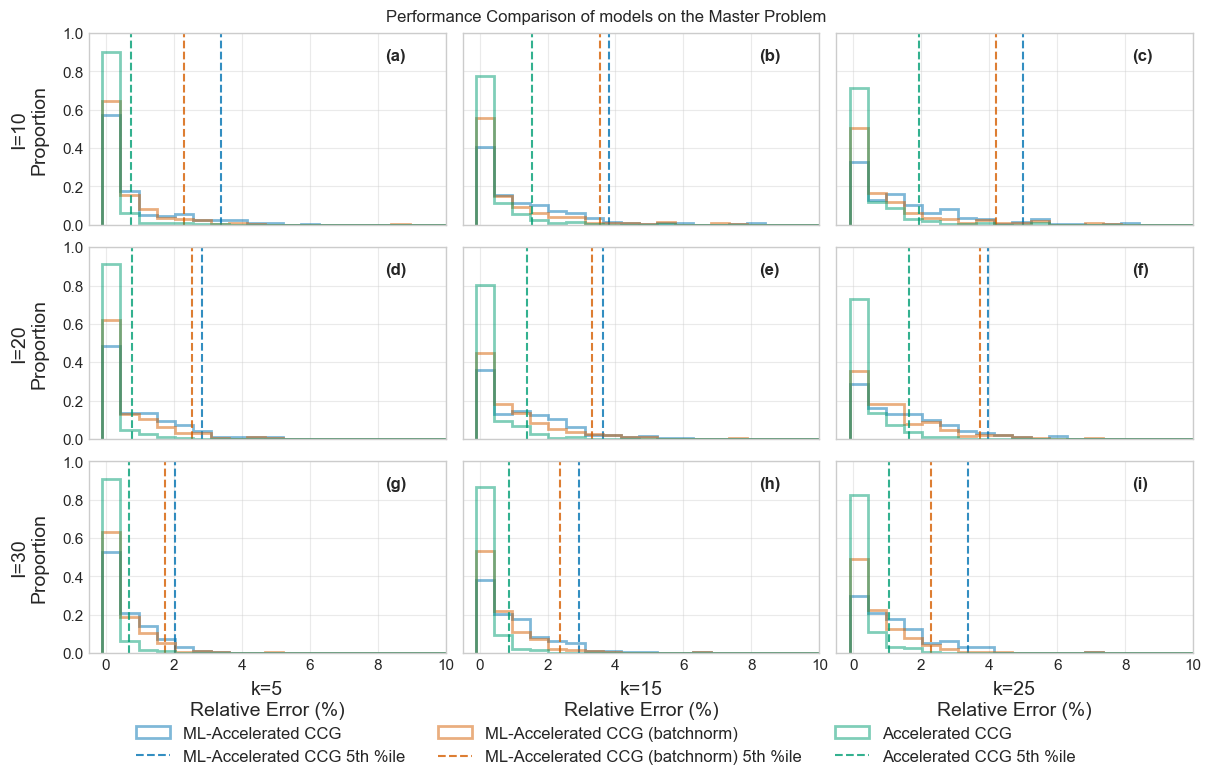

In [5]:
# ========== Plotting ==========
# 1) Use a single style for a modern, clean aesthetic
#plt.style.use("seaborn-v0_8")
#plt.style.use("classic")
plt.style.use("seaborn-v0_8-whitegrid")
# 2) Color-blind-friendly colors
colors = {
    'restricted': '#0072B2',  # Blue
    'improved':   '#D55E00',  # Red/Orange
    'mp':         '#009E73',  # Green
}

# Create the figure
fig, axs = plt.subplots(
    nrows=len(I_list),
    ncols=len(k_list),
    figsize=(12, 7),
    sharex=True,
    sharey=True,
    constrained_layout=True
)

# Update font sizes
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

# Define histogram bins
global_bins = np.linspace(global_min, global_max, num_bins)
global_bins.sort()

for row_idx, I in enumerate(I_list):
    for col_idx, k in enumerate(k_list):
        ax = axs[row_idx, col_idx]

        # Percentage improvements
        rd_restricted = (obj_decomp[I][k] - obj_exact[I][k]) * 100 / obj_exact[I][k]
        rd_improved   = (obj_decomp_improved[I][k] - obj_exact[I][k]) * 100 / obj_exact[I][k]
        rd_mp         = (obj_decomp_l2exact[I][k] - obj_exact[I][k]) * 100 / obj_exact[I][k]

        # Plot each method in a loop
        for data, label, color in zip(
            [rd_restricted, rd_improved, rd_mp],
            ["ML-Accelerated CCG", "ML-Accelerated CCG (batchnorm)", "Accelerated CCG"],
            [colors['restricted'], colors['improved'], colors['mp']]
        ):
            filtered_data = data[(data >= global_min) & (data <= global_max)]
            if len(filtered_data) == 0:
                print(f"No data in range for I={I}, k={k}, method={label}")
                continue

            # Plot histogram as proportion
            weights = np.ones_like(filtered_data) / len(filtered_data)
            hist_label = label if (row_idx == 0 and col_idx == 0) else None
            ax.hist(filtered_data,
                    bins=global_bins,
                    weights=weights,
                    histtype='step',
                    linewidth=2,
                    alpha=0.5,
                    color=color,
                    label=hist_label)

            # Plot 95th percentile line
            p95 = np.percentile(filtered_data, 95)
            pct_label = (f"{label} 5th %ile" if (row_idx == 0 and col_idx == 0) else None)
            ax.axvline(
                p95,
                color=color,
                linestyle='--',
                linewidth=1.5,
                alpha=0.8,
                label=pct_label
            )

        # Axes and labels
        ax.set_xlim(-0.5, global_max)
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.4)

        if row_idx == len(I_list) - 1:
            ax.set_xlabel(f"k={k}\nRelative Error (%)", labelpad=6)
        if col_idx == 0:
            ax.set_ylabel(f"I={I}\nProportion", labelpad=10)

        # Subplot label
        subplot_label = f"({chr(97 + row_idx * len(k_list) + col_idx)})"
        ax.text(
            0.83, 0.92,
            subplot_label,
            transform=ax.transAxes,
            fontsize=12,
            fontweight='bold',
            va='top'
        )

# Collect handles & labels for a single legend
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.08),
    ncol=3,
    frameon=False,
    fontsize=12
)

plt.suptitle("Performance Comparison of models on the Master Problem", y=1.02, fontsize=12)

# Save figure (300 DPI for publication)
plt.savefig("final_optimization_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


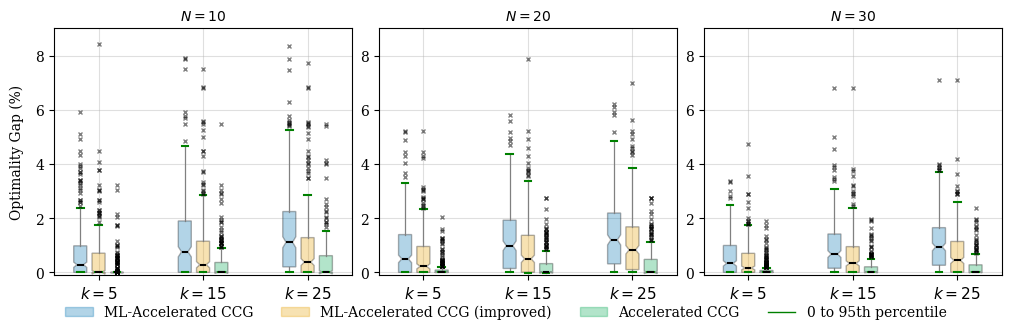

In [48]:
# 1) Enable LaTeX rendering (requires installed LaTeX distribution!)
plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"

plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

# 2) Methods to compare (labels + colors)
methods = [
    ("ML-Accelerated CCG",           "#0072B2"),  # Blue
    ("ML-Accelerated CCG (improved)", "#E69F00"),  # Orange
    ("Accelerated CCG",              "#00A650")   # Vibrant Green
]

# 3) Create Figure & Subplots
fig, axs = plt.subplots(
    nrows=1,
    ncols=len(I_list),
    figsize=(10, 3),  # Original: (10, 3)
    constrained_layout=True
)

# 4) Font adjustments
plt.rcParams.update({
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# 5) Plot: One Subplot per I
for col_idx, I in enumerate(I_list):
    ax = axs[col_idx] if len(I_list) > 1 else axs

    # Create "clusters" along x-axis: if k_list = [5, 15, 25], cluster_centers = [1,2,3]
    cluster_centers = np.arange(1, 2*len(k_list), 2)
    cluster_labels = [fr"$k = {k}$" for k in k_list] 
    offsets = [-0.35, 0.0, 0.35]   # offset each method's box plot

    for j, k in enumerate(k_list):
        # Relative error (in %)
        rd_restricted = (obj_decomp[I][k] - obj_exact[I][k]) * 100 / obj_exact[I][k]
        rd_improved   = (obj_decomp_improved[I][k] - obj_exact[I][k]) * 100 / obj_exact[I][k]
        rd_mp         = (obj_decomp_l2exact[I][k] - obj_exact[I][k]) * 100 / obj_exact[I][k]

        # Optional clamp within [global_min, global_max]
        rd_restricted = rd_restricted[(rd_restricted >= global_min) & (rd_restricted <= global_max)]
        rd_improved   = rd_improved[(rd_improved >= global_min) & (rd_improved <= global_max)]
        rd_mp         = rd_mp[(rd_mp >= global_min) & (rd_mp <= global_max)]

        data = [rd_restricted, rd_improved, rd_mp]

        # x positions for these 3 methods in cluster j
        center_x = cluster_centers[j]
        positions = [center_x + off for off in offsets]

        # Draw box plots
        bp = ax.boxplot(
            data,
            positions=positions,
            widths=0.25,
            patch_artist=True,
            notch=True,
            showfliers=True,
                flierprops={
                                "marker": "x",            # Use 'x' instead of the default 'o'
                                "markerfacecolor": "gray", # or any color you prefer
                                "markeredgecolor": "black",
                                "markersize": 3,          # adjust size
                                "alpha":0.5,
                                "linestyle": "none",      # ensures only the marker is shown
                            },
            medianprops=dict(color="black", linewidth=1.5),
            whiskerprops=dict(color="gray", linewidth=0.9),
            capprops=dict(color="green", linewidth=1.5),
        )

        # Color the boxes
        for patch, (method_label, color) in zip(bp['boxes'], methods):
            patch.set_facecolor(color)
            patch.set_alpha(0.3)
    if col_idx == 0:
        # Show x-axis ticks and labels for first subplot
        ax.set_xticks(cluster_centers)
        ax.set_xticklabels(cluster_labels, fontsize=11)
    else:
        # Remove x-axis ticks and labels for other subplots
        ax.set_xticks([])
        ax.set_xticklabels([])
        
    # X-axis formatting
    ax.set_xticks(cluster_centers)
    ax.set_xticklabels(cluster_labels, fontsize=11)
    if col_idx == 0:
        ax.set_ylabel("Relative Error (%)", labelpad=10)
    ax.set_title(fr"$\mathit{{N}} = {I}$", fontsize=10)
    ax.set_ylim(global_min, 9)
    ax.grid(True, alpha=0.4)
    #ax.set_xlabel(r"$k$", labelpad=8)  # italic k

    # Y-axis formatting
    if col_idx == 0:
        ax.set_ylabel("Optimality Gap (%)", labelpad=8)

    # Subplot title: italic I in LaTeX
    # If I=10, shows "I = 10" in math-italic
    ax.set_title(fr"$\mathit{{N}} = {I}$", fontsize=10)

    ax.set_ylim(global_min, 9)
    ax.grid(True, alpha=0.4)

# ========== Legend ==========
# Create patches for the 3 methods
legend_patches = []
for (method_label, color) in methods:
    patch = mpatches.Patch(color=color, alpha=0.3, label=method_label)
    legend_patches.append(patch)

# e.g., green line for 95th percentile or something else:
line_95p = mlines.Line2D([], [], color="green", linestyle="-", linewidth=1,
                         label="0 to 95th percentile")

# Combine patches and line
all_handles = legend_patches + [line_95p]

fig.legend(
    handles=all_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.09),
    ncol=4,
    frameon=False,
    fontsize=10
)

# Optional main title for entire figure
# plt.suptitle(r"Comparison of Master Decomposition Methods $(N=10,20,30)$", 
#              fontsize=10, y=-0.038)

# Save figure with high resolution
plt.savefig("single_row_boxplot.png", dpi=200, bbox_inches="tight")
plt.show()